In [5]:
from xmitgcm import open_mdsdataset
data_dir = '/project/6001902/jxchang/Ex1/results/RunFr6700/input/'
ds = open_mdsdataset(data_dir, geometry='cartesian', endian='<')

ds=ds.assign_coords(XC0 = ds.XC/1000.-ds.XC.mean()/1000.)
ds=ds.assign_coords(XG0 = (ds.XG-ds.XC.mean())/1000.)

/home/jxchang/jupyter_py3/lib/python3.7/site-packages/xmitgcm/mds_store.py:217: FutureWarning: In xarray version 0.15 `auto_combine` will be deprecated. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi
  ds = xr.auto_combine(datasets)
/home/jxchang/jupyter_py3/lib/python3.7/site-packages/xmitgcm/mds_store.py:217: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.15 this will operation will require either using the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset), with a nested lis

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seawater as sw
from matplotlib import cm
from matplotlib.colors import BoundaryNorm
import matplotlib.animation as animation

t = 0
xmin = 40
xmax = 75
vmax = 1.5
vmin = -1.5
wmax = 0.2
wmin = -0.2
tmax = 30
tmin = 0
Ub = np.mean(ds.UVEL.values[0, :, 0, 0])
print(Ub)
numcol=41

1.742


In [2]:
pwd

'/project/6001902/jxchang/Ex1/results/RunFr6700/input'

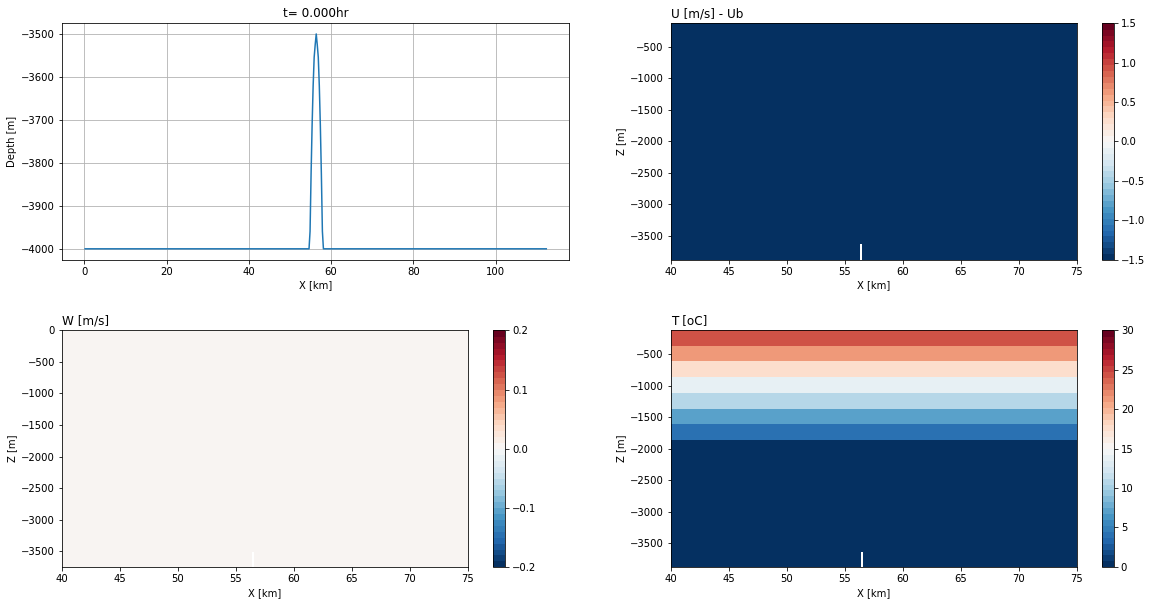

IndexError: index 53 is out of bounds for axis 0 with size 53

In [23]:
#plot bathymetry
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(20,10))
fig.subplots_adjust(hspace=0.3)
#fig.suptitle("t", fontsize=12)
axs = axs.flatten()

axs[0].plot(ds.Depth.XC.values/1e3, -np.transpose(ds.Depth.values))
axs[0].set_xlabel('X [km]')
axs[0].set_ylabel('Depth [m]')
axs[0].grid(True)

#plot u velocity
cmap = cm.RdBu_r
levels = np.linspace(vmin, vmax, num=numcol)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
pcolor_opts1 = {'cmap':cm.get_cmap(cmap, len(levels) - 1), 'norm': norm}

T0 = np.squeeze(ds.THETA.values[0, :, :, :])
UVEL = np.squeeze(ds.UVEL.values[t, :, :, :])
UVEL = np.ma.masked_where(T0 == 0, UVEL)
X, Z = np.meshgrid(ds.UVEL.XG, ds.UVEL.Z)

cset1 = axs[1].pcolormesh(X/1e3, Z, UVEL[:-1,:-1]-Ub, **pcolor_opts1)
fig.colorbar(cset1, ax=axs[1],ticks=np.arange(vmin, vmax+0.1, 0.5))
axs[1].set_xlabel('X [km]')
axs[1].set_ylabel('Z [m]')
axs[1].set_title('U [m/s] - Ub', loc='left')
axs[1].set(xlim=(xmin, xmax))

#plot vertical velocity
levels = np.linspace(wmin, wmax, num=numcol)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
pcolor_opts2 = {'cmap':cm.get_cmap(cmap, len(levels) - 1), 'norm': norm}

WVEL = np.squeeze(ds.WVEL.values[t, :, :, :])
WVEL = np.ma.masked_where(T0 == 0, WVEL)
X, Z = np.meshgrid(ds.WVEL.XC, ds.WVEL.Zl)

cset2 = axs[2].pcolormesh(X/1e3, Z, WVEL[:-1,:-1], **pcolor_opts2)
fig.colorbar(cset2, ax=axs[2],ticks=np.arange(wmin, wmax+0.01, 0.1))
axs[2].set_xlabel('X [km]')
axs[2].set_ylabel('Z [m]')
axs[2].set_title('W [m/s]', loc='left')
axs[2].set(xlim=(xmin, xmax))

# plot temperature
levels = np.linspace(tmin, tmax, num=numcol)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
pcolor_opts3 = {'cmap':cm.get_cmap(cmap, len(levels) - 1), 'norm': norm}

THETA = np.squeeze(ds.THETA.values[t, :, :, :])
THETA = np.ma.masked_where(T0 == 0, THETA)
N = sw.bfrq(35,T0[:,0],ds.THETA.Z)
X, Z = np.meshgrid(ds.THETA.XC, ds.THETA.Z)

cset3 = axs[3].pcolormesh(X/1e3, Z, THETA[:-1,:-1], **pcolor_opts3)
fig.colorbar(cset3, ax=axs[3],ticks=np.arange(tmin, tmax+0.1, 5))
axs[3].set_xlabel('X [km]')
axs[3].set_ylabel('Z [m]')
axs[3].set_title('T [oC]', loc='left')
axs[3].set(xlim=(xmin, xmax))


tt: int=0
tmax = 53
def updateData(tt):

    U = np.squeeze(ds.UVEL.values[tt,:,:,:])
    U = np.ma.masked_where(T0 == 0, U)
    W = np.squeeze(ds.WVEL.values[tt,:,:,:])
    W = np.ma.masked_where(T0 == 0, W)
    T = np.squeeze(ds.THETA.values[tt,:,:,:])
    T = np.ma.masked_where(T0 == 0, T)
    time = ds.time.values[tt]/3600
    cset1.set_array(U[:-1,:-1].flatten() - Ub)
    cset2.set_array(W[:-1, :-1].flatten())
    cset3.set_array(T[:-1, :-1].flatten())
    axs[0].set_title('t= %2.3fhr' % time)



simulation = animation.FuncAnimation(fig, updateData, blit=False, frames=200, interval=40, repeat=False)
plt.draw()
plt.show()
simulation.save(filename='summary_pcolor_amplf1.gif', writer='imagemagick', fps=2)

In [24]:
from IPython.display import Image
from IPython.display import display
display(Image(url='./summary_pcolor_amplf1.gif'))